In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
data = pd.read_csv("./benito_juarez.csv")
data.head()

,attributes,price,status,adress
0,281 m² construidos | 4 recs.,"8,500,000",Casa en venta,Lopez Cotilla - Del Valle Sur - Benito Juárez...
1,423 m² construidos,"17,000,000",Casa en venta,Del Valle Centro - Benito Juárez - Distrito F...
2,488 m² construidos | 6 recs.,"11,495,000",Casa en venta,Xochicalco - Narvarte Poniente - Benito Juáre...
3,389 m² construidos | 5 recs.,"11,000,000",Casa en venta,Tajin 20 - Narvarte Poniente - Benito Juárez ...
4,258 m² construidos | 4 recs.,"11,400,000",Casa en venta,Porfirio Díaz 156 - Del Valle Centro - Benito...


In [4]:
d2 = data['adress']
data['adress'] = [i.replace("-",",") for i in d2]

In [5]:
splt_att = data["attributes"].str.split("|", n = 2, expand = True) # splitting atribute a couple times
splt_att.columns = ['x','rooms']
s_a2 = splt_att["x"].str.split(" ", n = 3, expand = True)
s_a2.columns = ['index', 'm2', 'metric','state']

m2 = s_a2['m2']
state = s_a2['state']
rooms = splt_att['rooms']

clean_data = pd.DataFrame({'Status': data['status'], 
                           'm2': m2, 
                           'State': state, 
                           'Rooms': rooms, 
                           'Price': data['price'], 
                           'Adress': data['adress']})

clean_data.head()

,Status,m2,State,Rooms,Price,Adress
0,Casa en venta,281,construidos,4 recs.,"8,500,000","Lopez Cotilla , Del Valle Sur , Benito Juárez..."
1,Casa en venta,423,construidos,None,"17,000,000","Del Valle Centro , Benito Juárez , Distrito F..."
2,Casa en venta,488,construidos,6 recs.,"11,495,000","Xochicalco , Narvarte Poniente , Benito Juáre..."
3,Casa en venta,389,construidos,5 recs.,"11,000,000","Tajin 20 , Narvarte Poniente , Benito Juárez ..."
4,Casa en venta,258,construidos,4 recs.,"11,400,000","Porfirio Díaz 156 , Del Valle Centro , Benito..."


In [6]:
clean_data.to_csv("./clean_data.csv")

In [7]:
clean_data['Price'] = clean_data['Price'].str.replace(',', '').astype(float)
clean_data['m2'] = clean_data['m2'].astype(float)

<IPython.core.display.Javascript object>


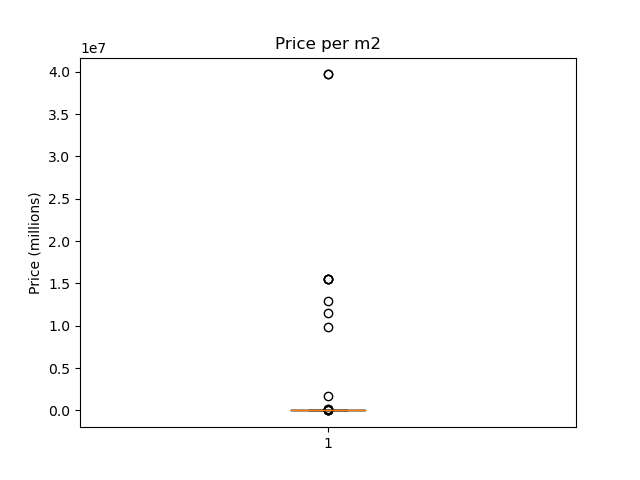

Values above 73462.41 could be outliers.


In [8]:
price_per_m2 = clean_data['Price']/clean_data['m2']

fig1, ax1 = plt.subplots()
ax1.set_title('Price per m2')
ax1.set_ylabel('Price (millions)')
ax1.boxplot(price_per_m2)
plt.show()

quartiles = price_per_m2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values above {round(upper_bound, 2)} could be outliers.")

In [9]:
clean_data.insert(5, "Price per m2", price_per_m2)
no_outliers = clean_data.loc[clean_data['Price per m2'] < 73462.41]
no_outliers.head()

,Status,m2,State,Rooms,Price,Price per m2,Adress
0,Casa en venta,281.0,construidos,4 recs.,8500000.0,30249.110320,"Lopez Cotilla , Del Valle Sur , Benito Juárez..."
1,Casa en venta,423.0,construidos,None,17000000.0,40189.125296,"Del Valle Centro , Benito Juárez , Distrito F..."
2,Casa en venta,488.0,construidos,6 recs.,11495000.0,23555.327869,"Xochicalco , Narvarte Poniente , Benito Juáre..."
3,Casa en venta,389.0,construidos,5 recs.,11000000.0,28277.634961,"Tajin 20 , Narvarte Poniente , Benito Juárez ..."
4,Casa en venta,258.0,construidos,4 recs.,11400000.0,44186.046512,"Porfirio Díaz 156 , Del Valle Centro , Benito..."


<IPython.core.display.Javascript object>


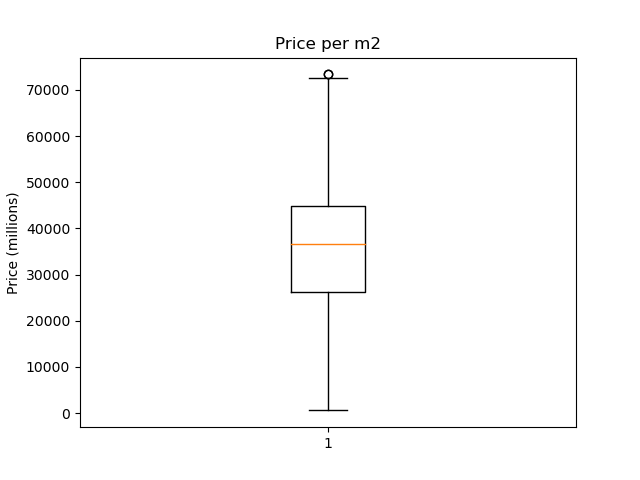

Price per m2 mean: 35094.7


In [16]:
fig1, ax1 = plt.subplots()
ax1.set_title('Price per m2')
ax1.set_ylabel('Price (millions)')
ax1.boxplot(no_outliers['Price per m2'])
plt.show()
print(f"Price per m2 mean: {round(no_outliers['Price per m2'].mean(), 2)}")